In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import gensim
from gensim import models
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel

In [3]:
####### Notebook 3 imports ###########################
import pyLDAvis
import pyLDAvis.gensim

In [4]:
nltk.download(["punkt", "stopwords"])

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import Data

In [5]:
data_dir = "Text-Mining-main/data/NYT_article_data.csv"
df = pd.read_csv(data_dir)

In [6]:
print(df.columns)
reviews = list(df["snippet"])
print(reviews[:3])

Index(['web_url', 'headline', 'snippet', 'word_count', 'source',
       'type_of_material', 'date', 'id'],
      dtype='object')
['Nick Kyrgios started his Brisbane Open title defense with a battling 7-6(5) 5-7 7-6(5) victory over American Ryan Harrison in the opening round on Tuesday.', "British police confirmed on Tuesday they were treating a stabbing attack which injured three people at Manchester's Victoria train station as a terrorist investigation, and were searching an address in the Cheetham Hill area of the city.", 'Marcellus Wiley is still on the fence about letting his young son play football. But the former NFL defensive end and Fox Sports personality tells PodcastOne Sports Now that he likes what the NFL is doing to try and make football a safer game, des...']


In [7]:
nltk.download(["stopwords", "punkt"])
stopwords_list = stopwords.words("english")
print(stopwords_list[:5])

['i', 'me', 'my', 'myself', 'we']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
processed_text = [
    [
        PorterStemmer().stem(word.lower())
        for word in word_tokenize(text)
        if not word.lower() in stopwords_list
        if word.isalpha()
    ]
    for text in reviews
]

print(processed_text[:5])

[['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american', 'ryan', 'harrison', 'open', 'round', 'tuesday'], ['british', 'polic', 'confirm', 'tuesday', 'treat', 'stab', 'attack', 'injur', 'three', 'peopl', 'manchest', 'victoria', 'train', 'station', 'terrorist', 'investig', 'search', 'address', 'cheetham', 'hill', 'area', 'citi'], ['marcellu', 'wiley', 'still', 'fenc', 'let', 'young', 'son', 'play', 'footbal', 'former', 'nfl', 'defens', 'end', 'fox', 'sport', 'person', 'tell', 'podcaston', 'sport', 'like', 'nfl', 'tri', 'make', 'footbal', 'safer', 'game', 'de'], ['still', 'reckon', 'fallout', 'emmett', 'till', 'paint', 'chasten', 'artist', 'reveal', 'controversi', 'chang', 'even', 'move', 'forward', 'new', 'galleri', 'show'], ['far', 'arik', 'ogunbowal', 'coach', 'muffet', 'mcgraw', 'concern', 'notr', 'dame', 'victori', 'louisvil', 'thursday', 'night', 'anoth', 'atlant', 'coast', 'confer', 'game', 'januari']]


In [9]:
clean_data = [' '.join(text) for text in processed_text]
print(clean_data[:5])

['nick kyrgio start brisban open titl defens battl victori american ryan harrison open round tuesday', 'british polic confirm tuesday treat stab attack injur three peopl manchest victoria train station terrorist investig search address cheetham hill area citi', 'marcellu wiley still fenc let young son play footbal former nfl defens end fox sport person tell podcaston sport like nfl tri make footbal safer game de', 'still reckon fallout emmett till paint chasten artist reveal controversi chang even move forward new galleri show', 'far arik ogunbowal coach muffet mcgraw concern notr dame victori louisvil thursday night anoth atlant coast confer game januari']


In [10]:
word_count = [len(text.split()) for text in clean_data]
# print(len(word_count))
# print(len(set(word_count)))

In [11]:
print(word_count)

[15, 22, 27, 17, 19, 12, 5, 11, 23, 13, 15, 12, 13, 21, 19, 10, 14, 15, 12, 12, 21, 8, 18, 14, 8, 24, 11, 21, 15, 12, 15, 26, 17, 25, 17, 19, 11, 16, 16, 8, 22, 18, 19, 10, 15, 6, 20, 18, 11, 9, 24, 7, 12, 16, 24, 23, 22, 19, 13, 14, 13, 19, 22, 23, 23, 13, 7, 21, 21, 23, 6, 19, 23, 23, 12, 21, 26, 6, 7, 22, 19, 14, 25, 10, 19, 13, 22, 13, 19, 14, 25, 14, 11, 17, 20, 9, 24, 24, 16, 7, 8, 11, 26, 22, 20, 14, 15, 23, 8, 23, 23, 7, 12, 24, 15, 3, 9, 19, 14, 28, 19, 11, 21, 18, 24, 22, 4, 22, 19, 9, 10, 17, 17, 8, 24, 12, 20, 19, 15, 26, 15, 19, 23, 10, 22, 21, 22, 16, 16, 18, 22, 24, 16, 18, 22, 22, 6, 17, 7, 20, 28, 14, 24, 15, 23, 22, 17, 25, 11, 24, 21, 14, 20, 23, 20, 14, 16, 15, 8, 10, 15, 19, 14, 16, 5, 8, 9, 12, 23, 25, 20, 19, 9, 15, 20, 25, 23, 18, 22, 30, 22, 15, 14, 24, 21, 10, 7, 11, 13, 19, 19, 14, 13, 15, 20, 12, 16, 13, 12, 5, 24, 27, 10, 11, 10, 13, 22, 11, 19, 6, 21, 16, 13]


<Axes: xlabel='Number of words per document', ylabel='Frequency'>

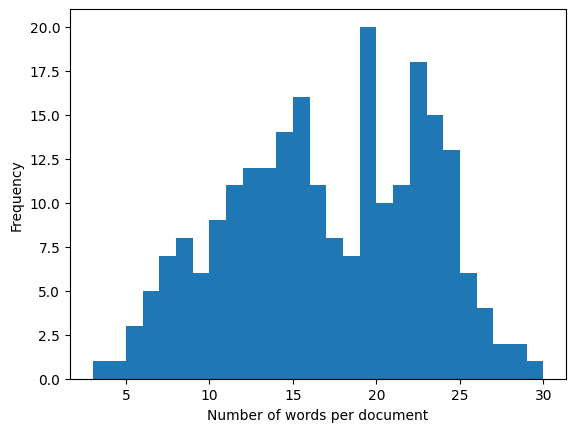

In [12]:
pd.Series(data=word_count).plot.hist(bins=len(set(word_count)),xlabel="Number of words per document", 
    ylabel="Frequency",)


In [13]:

# %pip install jupyterlab_vim

In [14]:
# %pip install nltk wordcloud "black[jupyter]"

In [15]:
a = pd.DataFrame(clean_data)
# print(a.isnull().sum())

a = "I love this movie"
a = word_tokenize(a)

In [16]:
# print(a)
# print(list(df["snippet"]))

In [17]:
word_count_array = np.array(word_count)
print(word_count_array)

[15 22 27 17 19 12  5 11 23 13 15 12 13 21 19 10 14 15 12 12 21  8 18 14
  8 24 11 21 15 12 15 26 17 25 17 19 11 16 16  8 22 18 19 10 15  6 20 18
 11  9 24  7 12 16 24 23 22 19 13 14 13 19 22 23 23 13  7 21 21 23  6 19
 23 23 12 21 26  6  7 22 19 14 25 10 19 13 22 13 19 14 25 14 11 17 20  9
 24 24 16  7  8 11 26 22 20 14 15 23  8 23 23  7 12 24 15  3  9 19 14 28
 19 11 21 18 24 22  4 22 19  9 10 17 17  8 24 12 20 19 15 26 15 19 23 10
 22 21 22 16 16 18 22 24 16 18 22 22  6 17  7 20 28 14 24 15 23 22 17 25
 11 24 21 14 20 23 20 14 16 15  8 10 15 19 14 16  5  8  9 12 23 25 20 19
  9 15 20 25 23 18 22 30 22 15 14 24 21 10  7 11 13 19 19 14 13 15 20 12
 16 13 12  5 24 27 10 11 10 13 22 11 19  6 21 16 13]


In [18]:
df_array = np.array(clean_data)
# print(df_array[:6])
print(len(df_array))

233


### Removing entries having smaller number of words in them

In [19]:
mask = np.where(word_count_array >= 5,True, False)
print(len(mask))
# print(mask)
## Now we got indices which we need
## make that df array now



233


In [20]:
## contains strings with more than 5 words
df_array = df_array[mask]

In [21]:
# print(df_array)

### Saving processed text

In [22]:
## Using pathlib
Path('clean_df.txt').write_text("\n".join(df_array))  

25007

## CountVectorizer

In [23]:
cv = CountVectorizer(ngram_range= (1,3))
X = cv.fit_transform(df_array).toarray()
y = cv.get_feature_names_out()
print(len(y))

## Number of words ==> 1921
## In number of sentences ==> 231
print(len(X))

8689
231


In [24]:
DTM = pd.DataFrame(X, columns= y)
# DTM.head()

### Understand this ??

In [25]:
sorted(DTM.sum().to_dict().items() , reverse=True , key = lambda kv: kv[1] )[:10]

[('said', 38),
 ('new', 36),
 ('presid', 28),
 ('year', 27),
 ('friday', 22),
 ('govern', 22),
 ('time', 18),
 ('tuesday', 17),
 ('like', 15),
 ('monday', 15)]

### Freq Dist Probability

In [26]:
from nltk.probability import FreqDist

In [27]:
corpus_freq_dist=nltk.FreqDist(
    dict(sorted(DTM.sum().to_dict().items() , 
    reverse=True ,
    key = lambda kv: kv[1])
)
)


In [28]:
# print(corpus_freq_dist.items())

In [29]:
# plt.figure(figsize=(50,10))
# corpus_freq_dist.plot()

## Making histogram

In [30]:
word_freq = pd.Series(   
    dict(
        sorted(DTM.sum().to_dict().items() , 
        reverse=True ,
        key = lambda kv: kv[1])
        )
    )


In [31]:
word_freq

said                    38
new                     36
presid                  28
year                    27
friday                  22
                        ..
zimbabw presid           1
zimbabw presid doubl     1
zykera                   1
zykera rice              1
zykera rice ad           1
Length: 8689, dtype: int64

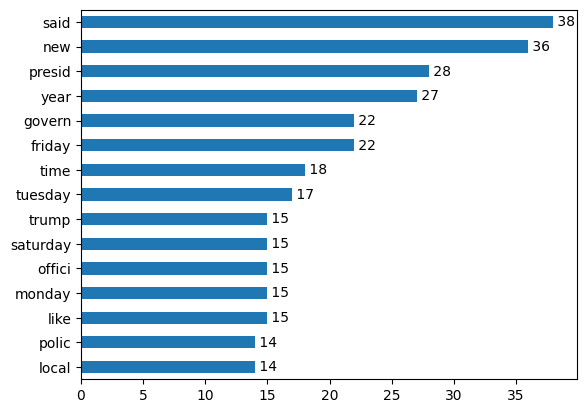

In [32]:
ax = word_freq[:15].sort_values(ascending=True).plot.barh()
for i in ax.containers:
    ax.bar_label(i, fmt=" %.0f")

## Ngram ????
## how many words makes one token
## Unigram, BiGrams

In [33]:
print(df_array[:5])

['nick kyrgio start brisban open titl defens battl victori american ryan harrison open round tuesday'
 'british polic confirm tuesday treat stab attack injur three peopl manchest victoria train station terrorist investig search address cheetham hill area citi'
 'marcellu wiley still fenc let young son play footbal former nfl defens end fox sport person tell podcaston sport like nfl tri make footbal safer game de'
 'still reckon fallout emmett till paint chasten artist reveal controversi chang even move forward new galleri show'
 'far arik ogunbowal coach muffet mcgraw concern notr dame victori louisvil thursday night anoth atlant coast confer game januari']


In [34]:
from wordcloud import WordCloud

In [35]:
# wordcloud = WordCloud(background_color="white")
# wordcloud = wordcloud.generate(" ".join(df_array))
# plt.figure(figsize= (27,20)) # Plot the cloud using matplotlib
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")

## TfIDf Notebook

In [36]:
print(df_array[:5])


['nick kyrgio start brisban open titl defens battl victori american ryan harrison open round tuesday'
 'british polic confirm tuesday treat stab attack injur three peopl manchest victoria train station terrorist investig search address cheetham hill area citi'
 'marcellu wiley still fenc let young son play footbal former nfl defens end fox sport person tell podcaston sport like nfl tri make footbal safer game de'
 'still reckon fallout emmett till paint chasten artist reveal controversi chang even move forward new galleri show'
 'far arik ogunbowal coach muffet mcgraw concern notr dame victori louisvil thursday night anoth atlant coast confer game januari']


## Gensim

In [37]:
texts = [['human', 'interface', 'computer']]
dct = gensim.corpora.Dictionary(texts)  # initialize a Dictionary



# dct.add_documents([["cat", "say", "meow"], ["dog"]])  # add more document (extend the vocabulary)
# dct.doc2bow(["dog", "computer", "non_existent_word"])
# [(0, 1), (6, 1)]

In [38]:
list(dct.items())

[(0, 'computer'), (1, 'human'), (2, 'interface')]

In [39]:
dictionary = gensim.corpora.Dictionary([sentence.split() for sentence in df_array])

In [40]:
list(dictionary.items())[:5]

[(0, 'american'), (1, 'battl'), (2, 'brisban'), (3, 'defens'), (4, 'harrison')]

## islice() Method ??

In [41]:
## 1925 to 200 
dictionary.filter_extremes(no_below= 4, no_above= 0.5, keep_n = 200)
len(list(dictionary.items()))

200

In [42]:
len(dictionary.items())
#### Dictionary contains important words now 

200

## Converting to Bag of Words 

In [43]:
# df_clean = [ text.split() for text in df_array]

In [44]:
bow_corpus = [ dictionary.doc2bow(doc.split()) for doc in df_array]


In [45]:
df_array[1]

'british polic confirm tuesday treat stab attack injur three peopl manchest victoria train station terrorist investig search address cheetham hill area citi'

In [46]:
firstList = bow_corpus[1]
firstList = [(dictionary[tup[0]], tup[1]) for tup in firstList]


In [47]:
firstList

[('tuesday', 1),
 ('attack', 1),
 ('citi', 1),
 ('investig', 1),
 ('peopl', 1),
 ('polic', 1),
 ('search', 1),
 ('three', 1)]

In [48]:
bow_corpus[0]

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1)]

## Transform counts with TfidfModel

In [49]:
###### Giving bow_corpus to TfidfModel

In [50]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [51]:
next(iter(corpus_tfidf))

[(0, 0.31942373876087665),
 (1, 0.3549009519669791),
 (2, 0.6118718565633235),
 (3, 0.3549009519669791),
 (4, 0.3059359282816618),
 (5, 0.22829905152454918),
 (6, 0.3549009519669791)]

## Making Directory

In [52]:
# Path('data').mkdir()
# Path('plot').mkdir()

## Making Latent Dirichlet Allocation

In [53]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus= corpus_tfidf, id2word= dictionary, num_topics=5, passes= 2, workers= 4 )

In [54]:
(lda_model_tfidf.print_topics())

[(0,
  '0.031*"world" + 0.017*"state" + 0.016*"govern" + 0.016*"know" + 0.013*"one" + 0.013*"minist" + 0.013*"new" + 0.012*"america" + 0.012*"tuesday" + 0.012*"billion"'),
 (1,
  '0.018*"help" + 0.017*"latest" + 0.017*"time" + 0.015*"leader" + 0.014*"move" + 0.014*"leagu" + 0.014*"expect" + 0.014*"head" + 0.013*"democrat" + 0.013*"local"'),
 (2,
  '0.019*"like" + 0.016*"first" + 0.016*"peopl" + 0.016*"day" + 0.015*"say" + 0.015*"kill" + 0.014*"tuesday" + 0.014*"said" + 0.014*"made" + 0.012*"weekend"'),
 (3,
  '0.025*"new" + 0.020*"said" + 0.019*"accus" + 0.017*"talk" + 0.017*"year" + 0.016*"friday" + 0.016*"set" + 0.015*"could" + 0.013*"appear" + 0.012*"american"'),
 (4,
  '0.025*"offici" + 0.018*"former" + 0.017*"time" + 0.016*"local" + 0.015*"trump" + 0.015*"saturday" + 0.014*"latest" + 0.014*"investig" + 0.014*"victori" + 0.014*"shutdown"')]

# Classify our documents within topics

In [55]:
df_array[0]

corpus_tfidf[0]

[(0, 0.31942373876087665),
 (1, 0.3549009519669791),
 (2, 0.6118718565633235),
 (3, 0.3549009519669791),
 (4, 0.3059359282816618),
 (5, 0.22829905152454918),
 (6, 0.3549009519669791)]

# Making Coherence Model

In [56]:
#### Calculate Topic Coherence
coherence_model_lda = CoherenceModel(
   model= lda_model_tfidf,
    texts= [ text.split() for text in df_array],
    dictionary= dictionary,
    coherence= "c_v"
)

coherence_lda = coherence_model_lda.get_coherence()

In [57]:
coherence_lda

0.5091366453440206

## How many Clusters (Number of topics) do we want ??

In [58]:
######### Coherence value vs 

In [80]:
topic_range = range(1,40,1)

model_list,cohere_list = zip(*[ 
    (
    lda_model_tfidf := gensim.models.LdaMulticore(
    corpus= corpus_tfidf,
    num_topics= nums,
    id2word= dictionary,
),
   CoherenceModel(
   model= lda_model_tfidf,
    texts= [ text.split() for text in df_array],
    dictionary= dictionary,
    coherence= "c_v"
).get_coherence())

     for nums in topic_range 
    ])

In [113]:
# model_list
# numtop_cohere_list
# num_top = [ model.num_topics for model in model_list]


################ MARTIN ADVANCE CODE ###################
pd.Series(cohere_list, index= topic_range).head(10).idxmax()

8

In [117]:
################ MARTIN ADVANCE CODE ###################
# pd.Series(cohere_list, index= topic_range).head().idxmax)

best_model= model_list[pd.Series(cohere_list, index= topic_range).head(10).idxmax() - 1]

In [88]:
# sorted(b,reverse=True ,key =  lambda x : x[1])[:5]
# model_list[4].num_topics
# sorted(cohere_list, reverse= True)
# max(cohere_list)

### Graph of Num topics vs Coherence Value

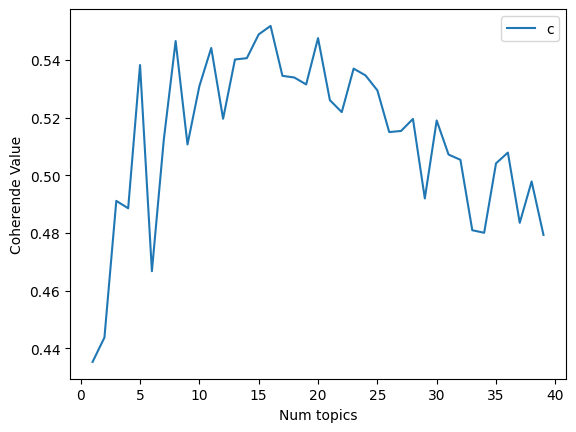

In [118]:
plt.plot(topic_range, cohere_list)
plt.xlabel("Num topics")
plt.ylabel("Coherende Value")
plt.legend("coherence value")

In [89]:
#### Best cohere value with understandable number of num topics
#### == 5 getting cohere value 0.538217399506297


## Topic Modelling 

In [119]:
vis = pyLDAvis.gensim.prepare(
    best_model,
    corpus= corpus_tfidf,
    dictionary= dictionary
)

pyLDAvis.display(vis)
